In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv('csv_files/titanic.csv')

In [5]:
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [21]:
df.shape

(891, 12)

In [22]:
df.drop(['PassengerId','Name','Ticket','Cabin'],inplace=True,axis=1)

In [23]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [24]:
df.isna().sum()/df.shape[0]*100

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Embarked     0.224467
dtype: float64

In [25]:
## Checking for Embarked column missing values
df[df['Embarked'].isna()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,female,38.0,0,0,80.0,NaN
829,1,1,female,62.0,0,0,80.0,NaN


In [26]:
df[~df['Embarked'].isna()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [27]:
df = df[~df['Embarked'].isna()]

In [28]:
df.isna().sum()/df.shape[0]*100

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.910011
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Embarked     0.000000
dtype: float64

<AxesSubplot:ylabel='Frequency'>

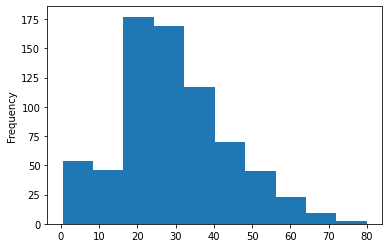

In [29]:
## Age has 20% missing values would need to replace it with either mean or median
df['Age'].plot.hist()

In [30]:
mean_value = df['Age'].mean()

In [31]:
median_value = df['Age'].median()

In [33]:
df['Age'].fillna(median_value,inplace=True)

In [34]:
df.isna().sum()/df.shape[0]*100

Survived    0.0
Pclass      0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Fare        0.0
Embarked    0.0
dtype: float64

In [35]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [39]:
pd.DataFrame(df.groupby("Sex")['Survived'].value_counts(normalize=True))

Survived
Sex    Survived          
female 1         0.740385
       0         0.259615
male   0         0.811092
       1         0.188908

In [47]:
## Checking Siblings data
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [48]:
df['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [49]:
pd.DataFrame(df.groupby("Parch")['Survived'].value_counts(normalize=True))

Survived
Parch Survived          
0     0         0.658284
      1         0.341716
1     1         0.550847
      0         0.449153
2     0         0.500000
      1         0.500000
3     1         0.600000
      0         0.400000
4     0         1.000000
5     0         0.800000
      1         0.200000
6     0         1.000000

In [50]:
pd.DataFrame(df.groupby("SibSp")['Survived'].value_counts(normalize=True))

Survived
SibSp Survived          
0     0         0.656766
      1         0.343234
1     1         0.535885
      0         0.464115
2     0         0.535714
      1         0.464286
3     0         0.750000
      1         0.250000
4     0         0.833333
      1         0.166667
5     0         1.000000
8     0         1.000000

In [43]:
pd.DataFrame(df.groupby("Pclass")['Survived'].value_counts(normalize=True))

Survived
Pclass Survived          
1      1         0.626168
       0         0.373832
2      0         0.527174
       1         0.472826
3      0         0.757637
       1         0.242363

In [46]:
pd.DataFrame(df.groupby("Embarked")['Survived'].value_counts(normalize=True))

Survived
Embarked Survived          
C        1         0.553571
         0         0.446429
Q        0         0.610390
         1         0.389610
S        0         0.663043
         1         0.336957

<AxesSubplot:title={'center':'Age'}, xlabel='Survived'>

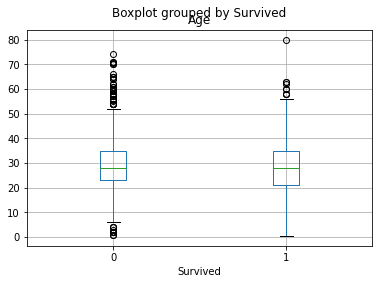

In [44]:
df.boxplot(column='Age',by='Survived')

<AxesSubplot:title={'center':'Fare'}, xlabel='Survived'>

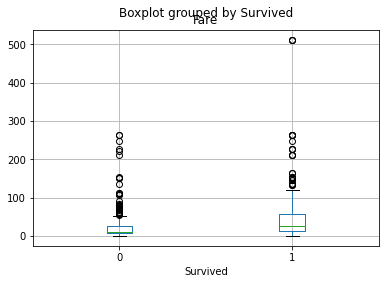

In [45]:
df.boxplot(column='Fare',by='Survived')

In [58]:
## Convert Nominal Categorical Sex,Embark column to one hot encoded

In [79]:
df.reset_index(inplace=True)

In [81]:
df.drop(['index'],axis=1,inplace=True)

In [82]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore',sparse=False)

In [83]:
df_sex = pd.DataFrame(enc.fit_transform(df[['Sex']]),columns=enc.categories_)

In [84]:
df_sex

,female,male
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0
...,...,...
884,0.0,1.0
885,1.0,0.0
886,1.0,0.0
887,0.0,1.0


In [86]:
df = pd.concat([df,df_sex],axis=1)

In [87]:
df_embarked = pd.DataFrame(enc.fit_transform(df[['Embarked']]),columns=enc.categories_)

In [89]:
df = pd.concat([df,df_embarked],axis=1)

In [105]:
df.columns

Index([ 'Survived',    'Pclass',       'Age',     'SibSp',     'Parch',
            'Fare', ('female',),   ('male',),      ('C',),      ('Q',),
            ('S',)],
      dtype='object')

In [104]:
df.drop(columns=['Sex','Embarked'],axis=1,inplace=True)

KeyError: "['Sex', 'Embarked'] not found in axis"

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [106]:
df_train,df_test = train_test_split(df,test_size=0.3,random_state=42)

In [107]:
df_train.columns

Index([ 'Survived',    'Pclass',       'Age',     'SibSp',     'Parch',
            'Fare', ('female',),   ('male',),      ('C',),      ('Q',),
            ('S',)],
      dtype='object')

In [108]:
print("Train shape ",df_train.shape)
print("Test shape ",df_test.shape)

Train shape  (622, 11)
Test shape  (267, 11)


In [109]:
x_train = df_train.drop(['Survived'],axis=1)
y_train = df_train['Survived']
x_test = df_test.drop(['Survived'],axis=1)
y_test = df_test['Survived']

In [110]:
print("x_train shape {} y_train shape {}".format(x_train.shape,y_train.shape))
print("x_test shape {} y_test shape {}".format(x_test.shape,y_test.shape))

x_train shape (622, 10) y_train shape (622,)
x_test shape (267, 10) y_test shape (267,)


In [111]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(x_train, y_train)

C:\Users\rahul\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


RandomForestClassifier(max_depth=2, random_state=0)

In [113]:
prediction_test = clf.predict(x_test)

C:\Users\rahul\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


In [114]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score,roc_auc_score

In [117]:
print("Accuracy of our model = {}".format(accuracy_score(y_test,prediction_test)))

Accuracy of our model = 0.7902621722846442


In [118]:
print("Precision of our model = {}".format(precision_score(y_test,prediction_test)))

Precision of our model = 0.72


In [119]:
print("Recall of our model = {}".format(recall_score(y_test,prediction_test)))

Recall of our model = 0.72
